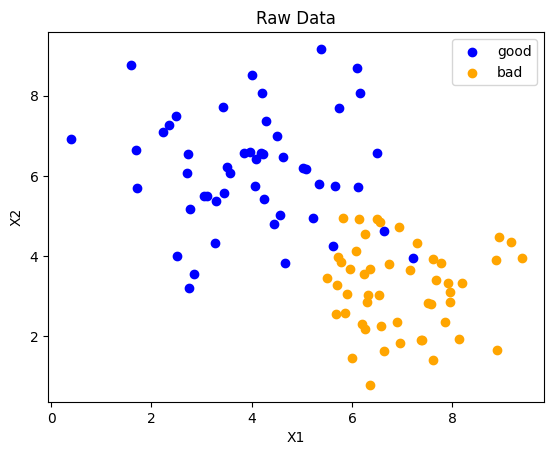

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 設定隨機種子以確保結果的可重現性
np.random.seed(0)

# 生成 "good" 類別的數據點
good_mean = [4, 6]
good_cov = [[2, 0], [0, 2]]  # 對角線協方差矩陣表示 X1 和 X2 是獨立的
good_data = np.random.multivariate_normal(good_mean, good_cov, 50)

# 生成 "bad" 類別的數據點
bad_mean = [7, 3]
bad_cov = [[1, 0], [0, 1]]  # 同樣假設 X1 和 X2 是獨立的
bad_data = np.random.multivariate_normal(bad_mean, bad_cov, 50)

# 繪製散點圖
plt.scatter(good_data[:, 0], good_data[:, 1], c='blue', label='good')
plt.scatter(bad_data[:, 0], bad_data[:, 1], c='orange', label='bad')
plt.title('Raw Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


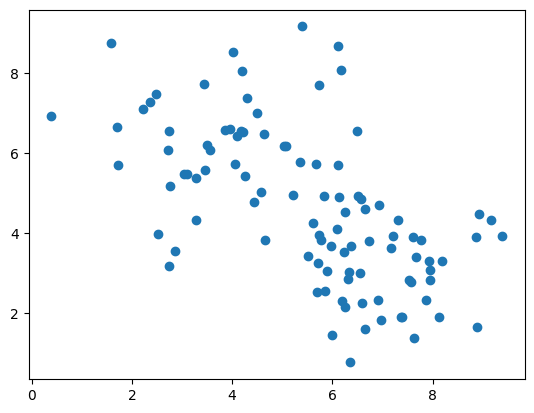

In [2]:
data = np.concatenate((good_data, bad_data), axis=0)
plt.scatter(data[:,0],data[:,1])

In [3]:
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope(contamination=0.02)
ad_model.fit(good_data)
model_pre = ad_model.predict(good_data)
print(model_pre)

[ 1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1]


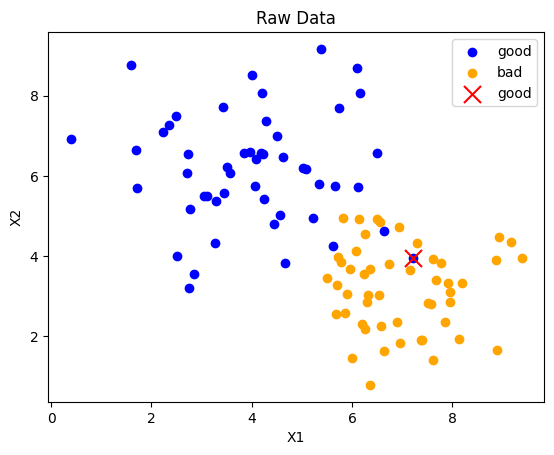

In [4]:
plt.scatter(good_data[:, 0], good_data[:, 1], c='blue', label='good')
plt.scatter(bad_data[:, 0], bad_data[:, 1], c='orange', label='bad')
plt.scatter(good_data[:, 0][model_pre==-1], good_data[:, 1][model_pre==-1], c='red', label='good',marker='x',s=150)
plt.title('Raw Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [5]:
good_data_s = good_data[model_pre==1]
data_s = np.concatenate((good_data_s, bad_data), axis=0)

[0.79846015 0.20153985]


<BarContainer object of 2 artists>

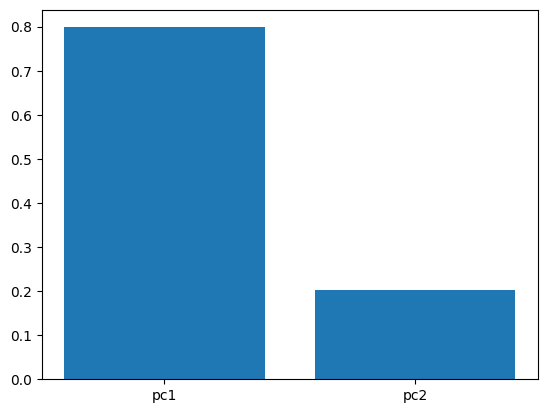

In [6]:
#pca

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data_norm = StandardScaler().fit_transform(data_s)
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_norm)
var_ratio = pca.explained_variance_ratio_
print(var_ratio)

plt.bar(['pc1','pc2'],var_ratio)

In [13]:
#### train and test split
good_data_s_y = np.insert(good_data_s, 2, 1, axis=1)  #axis = 1 中的 第 2 添加1  ( 99,2 ) -> ( 99,3 )
bad_data_y = np.insert(bad_data, 2, 0, axis=1)       
data_s_y = np.concatenate((good_data_s_y, bad_data_y), axis=0)
x = data_s_y[:,:2]
y = data_s_y[:,2]
print(x.shape,y.shape)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x,y, random_state=4, test_size=0.4)
print(x_train.shape , x_test.shape, x.shape, y_train.shape , y_test.shape, y.shape)

(99, 2) (99,)
(59, 2) (40, 2) (99, 2) (59,) (40,) (99,)


In [16]:
#knn model

from sklearn.neighbors import KNeighborsClassifier
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(x_train,y_train)
y_train_pre = knn10.predict(x_train)
y_test_pre = knn10.predict(x_test)

from sklearn.metrics import accuracy_score
ac_train = accuracy_score(y_train,y_train_pre)
ac_test = accuracy_score(y_test,y_test_pre)
print(ac_train,ac_test)

0.9830508474576272 0.95


(200, 200)
(200, 200)


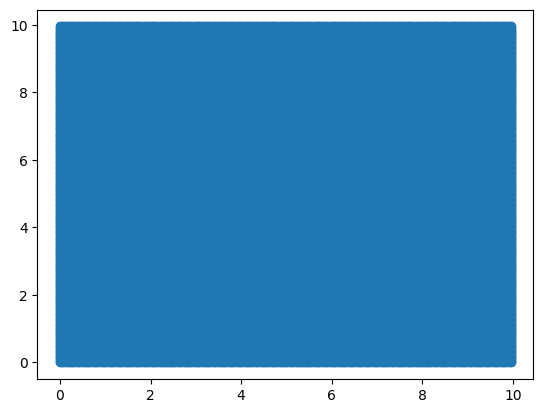

In [35]:
# visualize knn result
xx, yy = np.meshgrid(np.arange(0,10,0.05),np.arange(0,10,0.05))

plt.scatter(xx,yy)

print(xx.shape)
print(yy.shape)



(40000, 2)


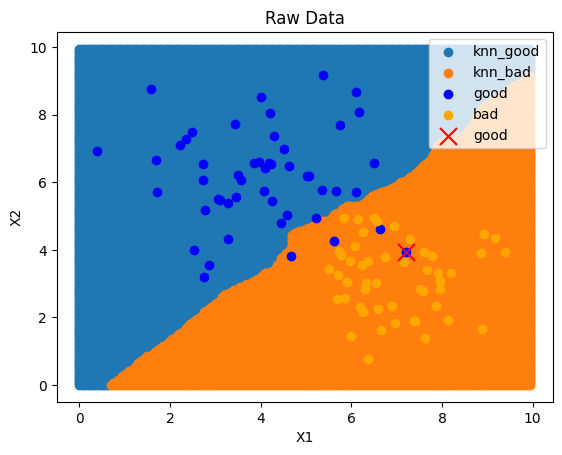

In [38]:
x_range = np.c_[xx.ravel(),yy.ravel()]
y_range_pre = knn10.predict(x_range)

print(x_range.shape)


plt.scatter(x_range[:, 0][y_range_pre==1], x_range[:, 1][y_range_pre==1], label='knn_good')
plt.scatter(x_range[:, 0][y_range_pre==0], x_range[:, 1][y_range_pre==0], label='knn_bad')

plt.scatter(good_data[:, 0], good_data[:, 1], c='blue', label='good')
plt.scatter(bad_data[:, 0], bad_data[:, 1], c='orange', label='bad')
plt.scatter(good_data[:, 0][model_pre==-1], good_data[:, 1][model_pre==-1], c='red', label='good',marker='x',s=150)
plt.title('Raw Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()



In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_pre)
print(cm)

TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

[[18  0]
 [ 2 20]]


In [47]:
#accuracy = (TP + TN)/(TP +TN + FP +FN)
accuracy = (TP + TN)/(TP +TN + FP +FN)
print('accuracy:',accuracy)

#sensitivity = recall = TP/(TP +FN)
recall = TP/(TP +FN)
print('recall:',recall)

#specificity = TN/(TP +FN)
specificity = TN/(TP +FN)
print('specificity:',specificity)

#precesion = TP/(TP+FP)
precesion = TP/(TP+FP)
print('precesion:',precesion)

#f1 score = 2*precesion*recall/(precesion+recall)
f1 = 2*precesion*recall/(precesion+recall)
print('f1 score:',f1)

accuracy: 0.95
recall: 0.9090909090909091
specificity: 0.8181818181818182
precesion: 1.0
f1 score: 0.9523809523809523


In [59]:
n = np.arange(1,21)

accuracy_train = []
accuracy_test = []

for i in range (1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_train_predit = knn.predict(x_train)
    y_test_predit = knn.predict(x_test)
    atr = accuracy_score(y_train,y_train_predit)
    ate = accuracy_score(y_test,y_test_predit)
    accuracy_train.append(atr)
    accuracy_test.append(ate)

print(accuracy_train,accuracy_test)

[1.0, 0.9661016949152542, 1.0, 0.9830508474576272, 0.9661016949152542, 0.9830508474576272, 0.9661016949152542, 0.9830508474576272, 0.9830508474576272, 0.9830508474576272, 0.9830508474576272, 0.9830508474576272, 0.9830508474576272, 0.9830508474576272, 0.9830508474576272, 0.9830508474576272, 0.9830508474576272, 0.9830508474576272, 0.9830508474576272, 0.9661016949152542] [0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95]


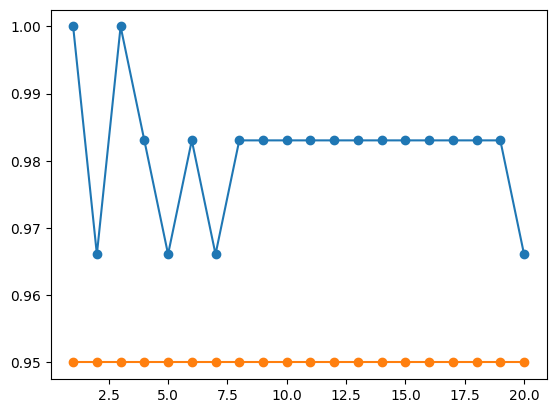

In [62]:
plt.plot(n,accuracy_train,marker = 'o')
plt.plot(n,accuracy_test,marker = 'o')